# Exploration et Préparation de Données en Machine Learning

## Introduction 

L’objectif initial de ce projet était de prédire, à l’aide d’un modèle de machine learning, si la durée nécessaire pour observer l’ensemble des caractéristiques d’un astéroïde traversant l’orbite de Mars dépasserait une année. Autrement dit, l’enjeu était de déterminer si un observateur aurait besoin de plus d’un an pour collecter toutes les informations pertinentes sur un astéroïde.

Cependant, le projet s’est concentré principalement sur les premières étapes clés du processus : l’exploration, la visualisation et le nettoyage des données. Ces étapes constituent une base essentielle pour tout projet de machine learning. Elles permettent d’assurer la qualité des données, de mieux comprendre les variables disponibles et d’orienter, plus tard, les choix méthodologiques pour la construction d’un modèle pertinent. Ainsi, bien que la phase de modélisation n’ait pas été réalisée, le travail mené jusqu’ici fournit une base solide et exploitable pour une future reprise du projet.

## I/ Exploration basique des données 

### 1. Analyse de forme :

- **Variable cible** : `data_arc`
- **Nombre de lignes et de colonnes** :
    - 1800 lignes 
    - 26 colonnes
- **Types de variables** : 
    - 22 qualitatives 
    - 4 quantitatives
- **Analyse des valeurs manquantes** : 
    - Très peu de valeurs manquantes ; le dataset est propre. 
    - Le groupe de données des écarts-type semble se démarquer avec 0.008% de NaN. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('final_observation_days.csv')
df = data.copy()
print(df.shape)
df.head()

(18000, 26)


,ID,full_name,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,...,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc
0,11674,(2013 OV4),5.756300e-08,1.605300e-08,0.000010,0.000030,0.000035,0.000017,2.254200e-08,2.054500e-09,...,323.057654,3.736782,1.585411,4.341093,117,129.101981,0.0,17.590,60200,8139.0
1,10222,(2011 QH117),3.958900e-06,4.475300e-07,0.000021,0.000217,0.002209,0.001641,5.622000e-07,9.165300e-08,...,322.595505,2.769871,1.639917,3.274085,18,255.757258,2.0,19.900,60200,3722.0
2,15475,(2016 AQ193),7.510200e-01,1.280000e+00,15.770000,4.632200,13.312000,90.643000,1.548700e+00,3.309800e-01,...,292.517373,2.430256,1.586762,2.846550,6,56.485758,9.0,20.288,57391,1.0
3,11743,(2013 PB88),1.572900e-07,1.930200e-07,0.000027,0.000016,0.000186,0.000228,2.654700e-07,2.684700e-08,...,272.252762,3.540067,1.607843,4.129615,34,109.396437,1.0,18.320,60200,3515.0
4,3226,380393 (2002 XL63),5.860500e-08,1.539100e-08,0.000007,0.000063,0.000064,0.000014,2.074800e-08,2.621900e-09,...,233.395947,3.199585,1.547266,3.656550,227,265.069228,0.0,17.920,60200,7507.0


In [3]:
df.dtypes.value_counts()

float64    22
int64       3
object      1
dtype: int64

<Axes: >

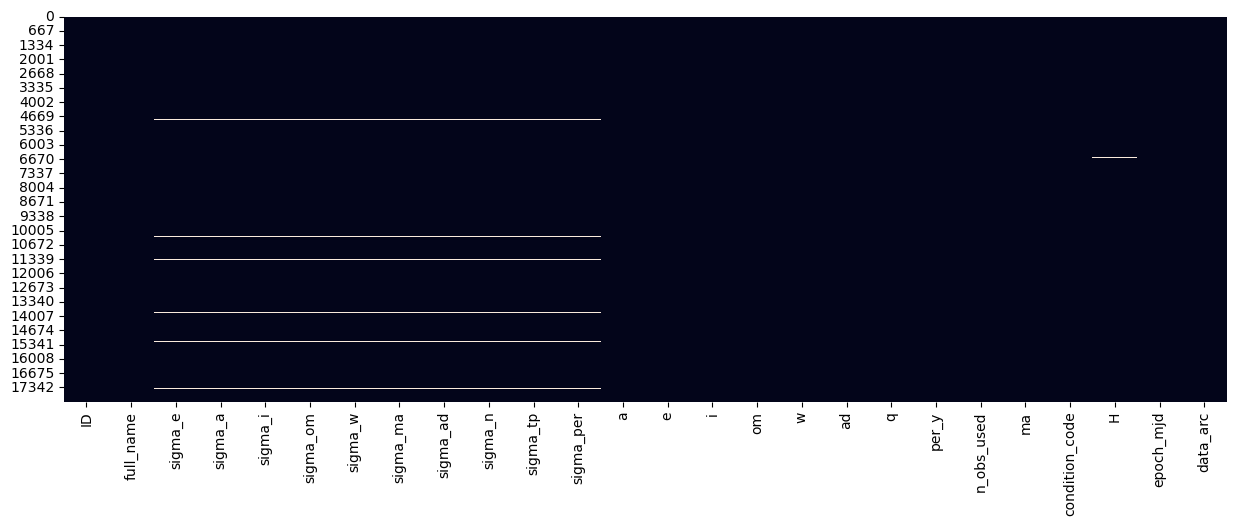

In [4]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna(), cbar=False)

In [5]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

ID                0.000000
ma                0.000000
n_obs_used        0.000000
per_y             0.000000
q                 0.000000
ad                0.000000
w                 0.000000
om                0.000000
i                 0.000000
e                 0.000000
epoch_mjd         0.000000
a                 0.000000
full_name         0.000000
data_arc          0.000000
condition_code    0.000056
H                 0.007167
sigma_tp          0.008389
sigma_n           0.008389
sigma_ad          0.008389
sigma_ma          0.008389
sigma_w           0.008389
sigma_om          0.008389
sigma_i           0.008389
sigma_a           0.008389
sigma_e           0.008389
sigma_per         0.008389
dtype: float64

### 2. Analyse de fond 

- **Visualition de la variable cible** : 79.66% de valeur supérieur à 1 ans. Nos classes ne sont donc pas équilibrées. 
- **Signification des variables** : 
    - **Variables continues** : 
        - Les variables `condition_code` et `data_arc` semble centrée en 0. 
        - La distribution des valeurs des variables `sigma` sont illisibles, mais elles pourraient être centrée en 0. 
        - La distribution des valeurs de la variable `H` est remarquable puisqu'il s'agit d'une distribution normale.
        - La variable `q` à une distribution assymétrique. Pour être plus rigoureux, il s'agit d'une distribution assymétrique négative. La queue de la distribution s'étend vers la gauche, ce qui indique une concentration de valeurs plus basses que la moyenne. La moyenne est généralement inférieure à la médiane dans ce type de distribution. 
        - Nous n'avons pas vu de données standardisées.
        - Pour `ma` ; l'anomalie moyenne, on pense que le données ont été traitées avec une transformation mathématique, mais on ne peut en être certain.
    - **Variables qualitatives** :
        - Pour nos variables catégorielles, on n'en a qu'une et elle est non binaire : c'est le nom des astéroïdes. On procède donc à sa binarisation pour permettre sa visualisation : on va séparer les astéroïdes dont la `data_arc` est supérieur à 1 ans, de ceux dont la `data_arc` est inférieur à 1 ans.  
- **Relation variables / variable cible** : 
    - **std / variable cible :** On peut constaster qu'*a priori*, les variables $\sigma$ sont complètement différentes suivants que la `data_arc` soit < ou > à $365 j$.
    - **q / variable cible :** Il semblerait que les cas `data_arc` $> 365 j$ ont des distances au périhélie plus importante (variable `q`).
    - **n_obs_used / variable cible :** *A priori*, le calcule des paramètres orbitaux des cas `data_arc` $> 365 j$ ont été basé sur nettement plus de points de données d'observation. On peut s'attendre à une plus grande précision des variables oribitales pour ces cas là. 
    - **condition_code / variable cible :** Il semble aussi que les paramètres orbitaux des cas `data_arc` $> 365 j$ aient des taux de fiabilité bien meilleur (variable `condition_code`).
    - **H / variable cible :** La distribution associée aux données de la variable `H` où `data_arc` $> 365 j$ est centrée autour d'une moyenne plus petite que celle associée aux données où `data_arc` $< 365 j$. Il se peut que les objets avec une durée de récupération plus longue aient tendance à être moins lumineux ou moins réfléchissants.
    - **epoch_mjd / variable cible :** Pour la variable `epoch_mjd`, on a là aussi une différence visuellement nette. Les distributions pour le cas `data_arc` $> 365 j$ sont plus importantes. Il se peut que les objets célestes avec une durée de récupération plus longue (data_arc > 365) peuvent être observés à des moments différents de l'année par rapport aux objets avec une durée de récupération plus courte. 

Avec une seule ligne de code, on supprime les colonnes qui comportent plus de 90% de valeurs manquantes ; puisqu'avec de telle colonne, il n'y a rien à faire. Comme ici, il n'y en a pas, le dataframe reste intact. 

In [6]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

On supprime également la colonne ID puisqu'elle est inutile pour l'analyse.

In [7]:
df=df.drop('ID', axis=1)
df.head()

,full_name,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,...,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc
0,(2013 OV4),5.756300e-08,1.605300e-08,0.000010,0.000030,0.000035,0.000017,2.254200e-08,2.054500e-09,0.000069,...,323.057654,3.736782,1.585411,4.341093,117,129.101981,0.0,17.590,60200,8139.0
1,(2011 QH117),3.958900e-06,4.475300e-07,0.000021,0.000217,0.002209,0.001641,5.622000e-07,9.165300e-08,0.005551,...,322.595505,2.769871,1.639917,3.274085,18,255.757258,2.0,19.900,60200,3722.0
2,(2016 AQ193),7.510200e-01,1.280000e+00,15.770000,4.632200,13.312000,90.643000,1.548700e+00,3.309800e-01,108.300000,...,292.517373,2.430256,1.586762,2.846550,6,56.485758,9.0,20.288,57391,1.0
3,(2013 PB88),1.572900e-07,1.930200e-07,0.000027,0.000016,0.000186,0.000228,2.654700e-07,2.684700e-08,0.000905,...,272.252762,3.540067,1.607843,4.129615,34,109.396437,1.0,18.320,60200,3515.0
4,380393 (2002 XL63),5.860500e-08,1.539100e-08,0.000007,0.000063,0.000064,0.000014,2.074800e-08,2.621900e-09,0.000053,...,233.395947,3.199585,1.547266,3.656550,227,265.069228,0.0,17.920,60200,7507.0


In [8]:
# On compte le nombre de valeur supérier à 1 ans d'observation nécessaire 
condition_1 = (df['data_arc'] > 365).sum()
condition_2 = (df['data_arc'] < 365).sum()

# On ajoute une nouvelle colonne au dataframe -> True si target_variable > 365, False sinon
# df['data_arc > 1 ans'] = np.where(condition_1, True, False)
df['data_arc > 1 ans'] = df['data_arc'] > 365

percent_condition_1 = (condition_1 / len(df)) * 100
percent_condition_2 = (condition_2 / len(df)) * 100

print(f"Pourcentage des valeurs supérieures à 1 an d'observation : {percent_condition_1:.2f}%")
print(f"Pourcentage des valeurs inférieures à 1 an d'observation : {percent_condition_2:.2f}%")
df.head()

Pourcentage des valeurs supérieures à 1 an d'observation : 79.66%
Pourcentage des valeurs inférieures à 1 an d'observation : 20.34%


,full_name,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,...,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc,data_arc > 1 ans
0,(2013 OV4),5.756300e-08,1.605300e-08,0.000010,0.000030,0.000035,0.000017,2.254200e-08,2.054500e-09,0.000069,...,3.736782,1.585411,4.341093,117,129.101981,0.0,17.590,60200,8139.0,True
1,(2011 QH117),3.958900e-06,4.475300e-07,0.000021,0.000217,0.002209,0.001641,5.622000e-07,9.165300e-08,0.005551,...,2.769871,1.639917,3.274085,18,255.757258,2.0,19.900,60200,3722.0,True
2,(2016 AQ193),7.510200e-01,1.280000e+00,15.770000,4.632200,13.312000,90.643000,1.548700e+00,3.309800e-01,108.300000,...,2.430256,1.586762,2.846550,6,56.485758,9.0,20.288,57391,1.0,False
3,(2013 PB88),1.572900e-07,1.930200e-07,0.000027,0.000016,0.000186,0.000228,2.654700e-07,2.684700e-08,0.000905,...,3.540067,1.607843,4.129615,34,109.396437,1.0,18.320,60200,3515.0,True
4,380393 (2002 XL63),5.860500e-08,1.539100e-08,0.000007,0.000063,0.000064,0.000014,2.074800e-08,2.621900e-09,0.000053,...,3.199585,1.547266,3.656550,227,265.069228,0.0,17.920,60200,7507.0,True


In [9]:
(df['data_arc > 1 ans']).value_counts(normalize=True)

True     0.796556
False    0.203444
Name: data_arc > 1 ans, dtype: float64

C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1985433949.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1985433949.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\valco\AppData\Local\Temp\ip

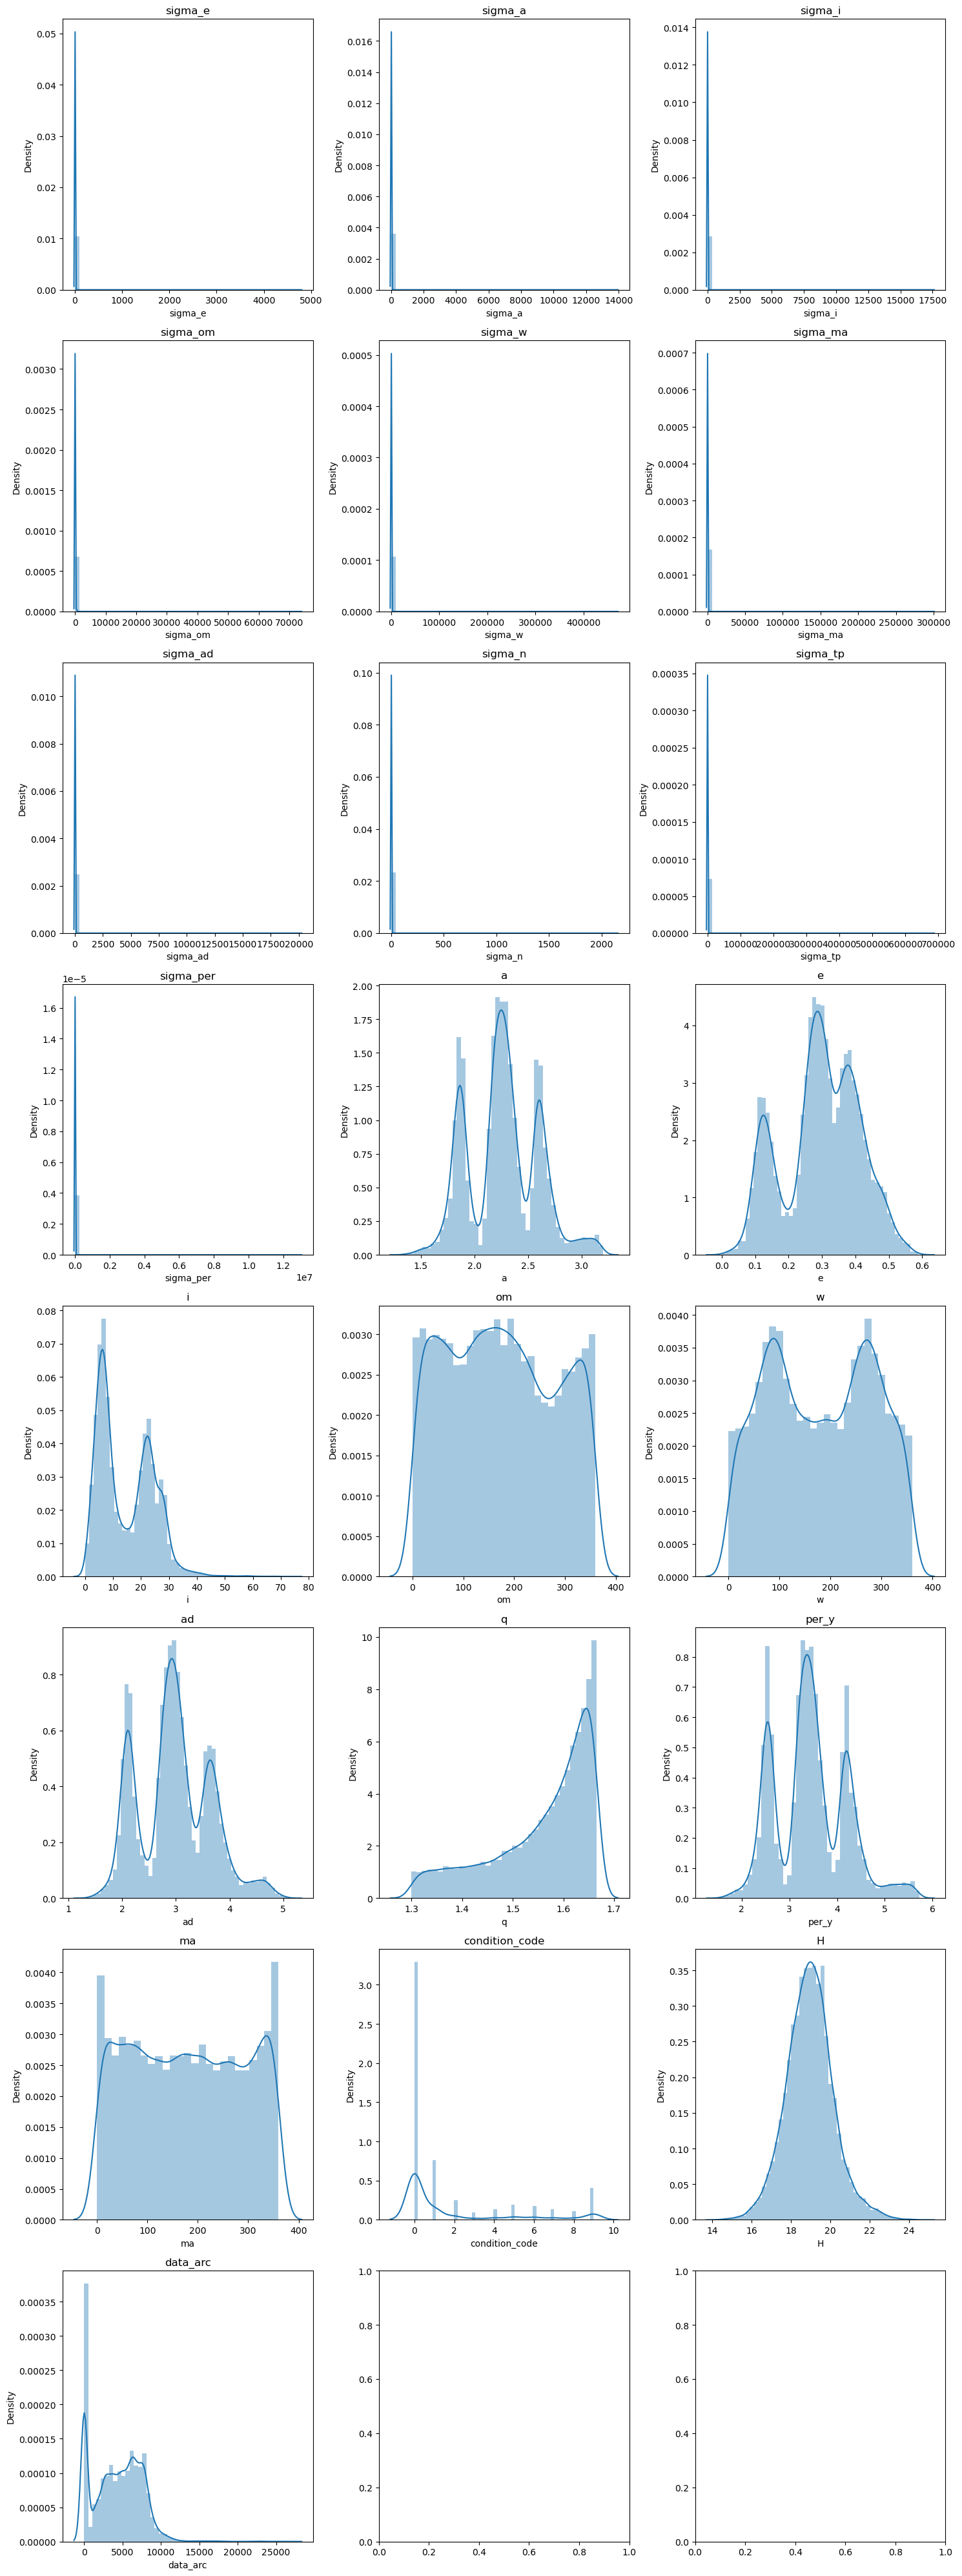

In [10]:
# On sélectionne les colonnes de type float dans le dataframe 
float_cols = df.select_dtypes('float').columns 

# On calcule le nombre de de sous-graphiques nécessaires et la dimension de la grille 
num_cols = 3 # Nombre de sous-graphiques par ligne 
num_rows = (len(float_cols) + num_cols - 1) // num_cols # Nombre de lignes nécessaire 

# on créer la figure et les sous-graphiques 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# On trace les distributions dans les sous-graphiques 
for i, col in enumerate(float_cols): 
    ax = axes[i // num_cols, i % num_cols]  # On sélectionne le sous-graphique 
    sns.distplot(df[col], ax=ax) 
    ax.set_title(col)                       # On ajoute le titre de la colonne 
    plt.tight_layout()

Un bon réflexe est de regarder les ditributions centrées en 0, puisqu'elles nous permettent d'identifier si des données ont été standardisées. Si c'est le cas, cela aura des implications significative sur l'échelle des caractéristiques et la convergence de notre futur modèle. 

C:\Users\valco\AppData\Local\Temp\ipykernel_23400\622748082.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\valco\AppData\Local\Temp\ipykernel_23400\622748082.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\valco\AppData\Local\Temp\ipyk

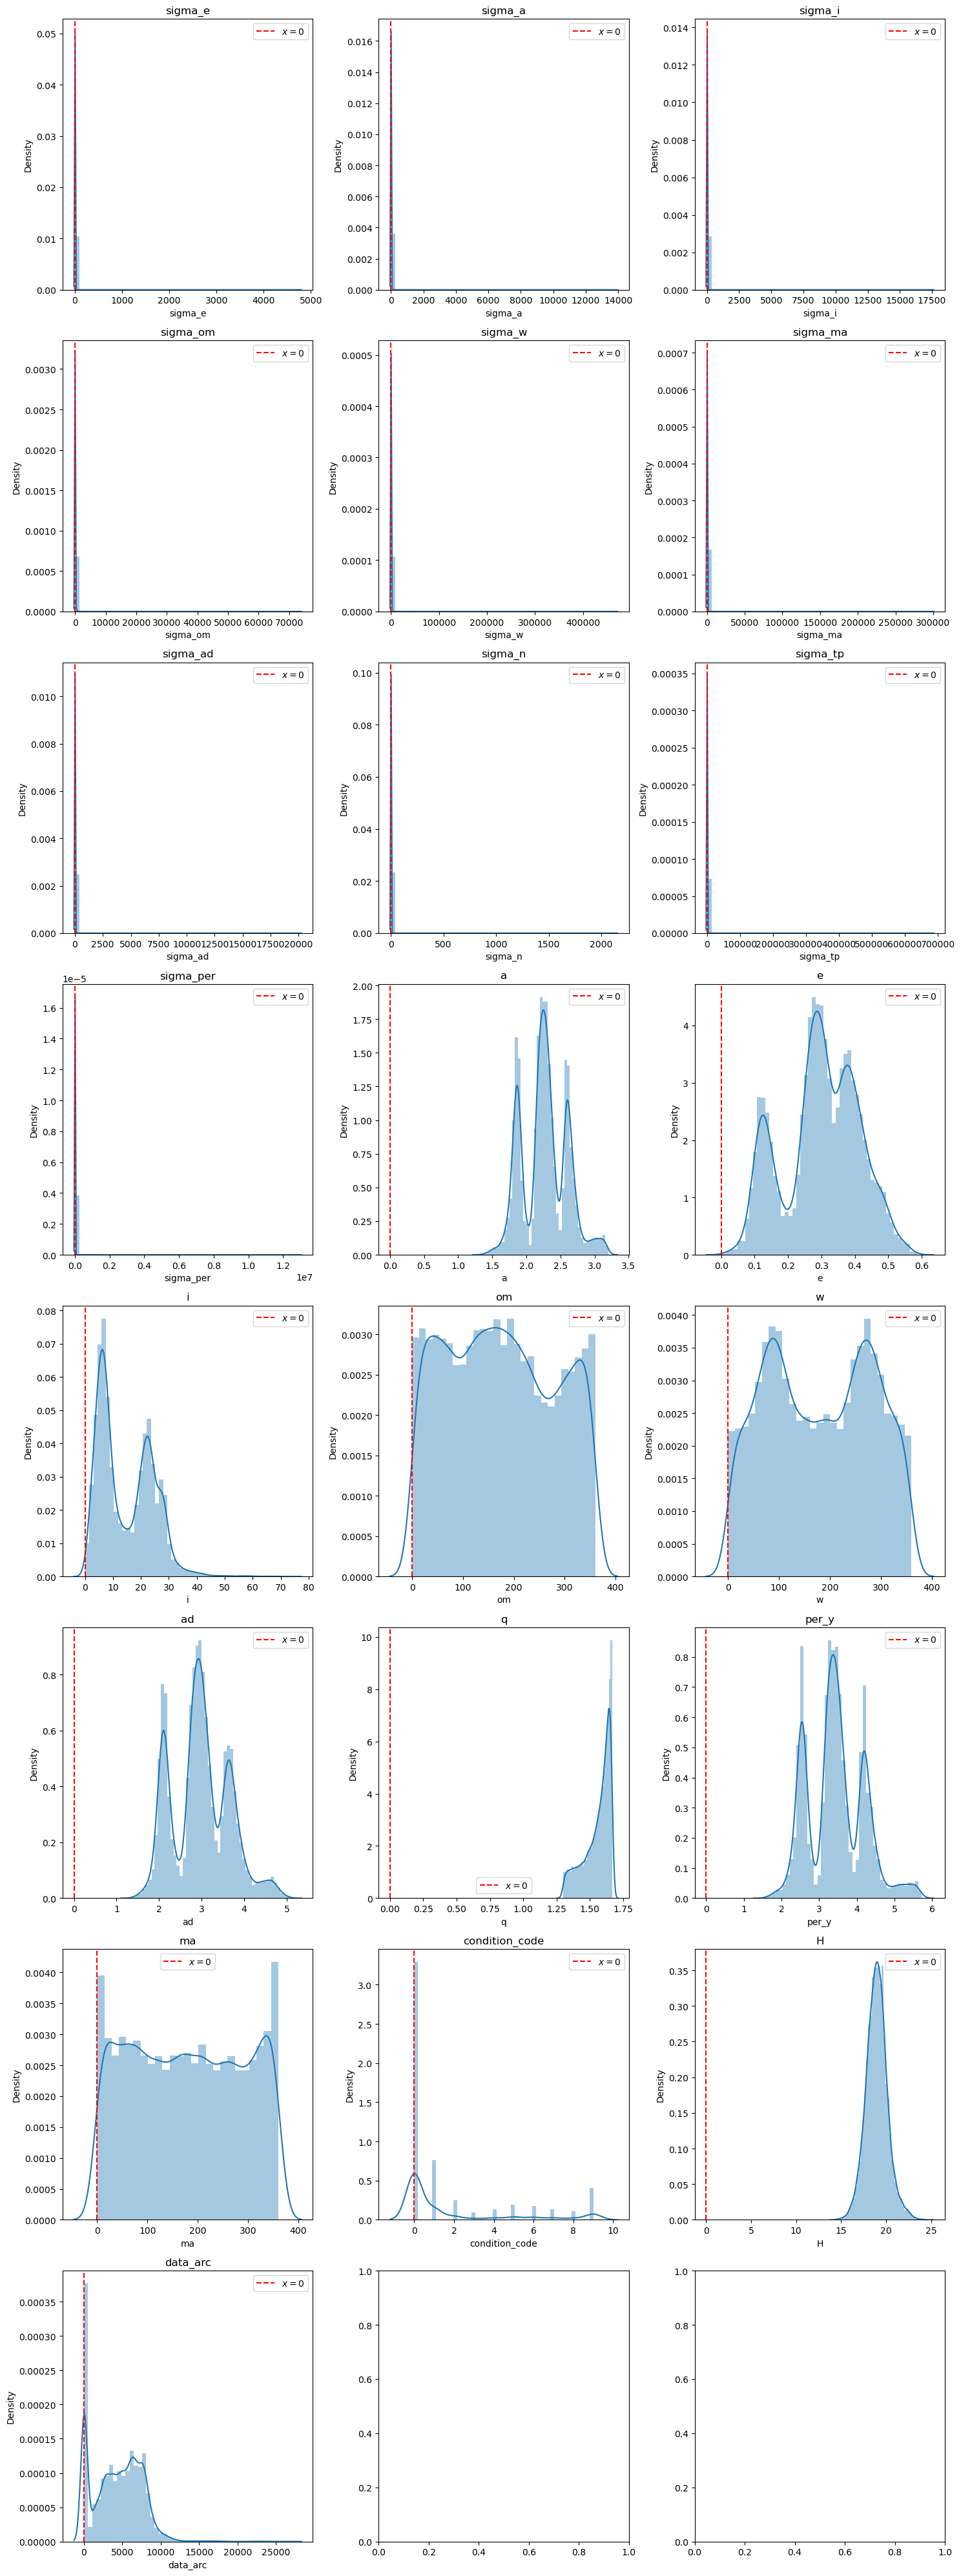

In [11]:
float_cols = df.select_dtypes('float').columns

num_cols = 3
num_rows = (len(float_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(float_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.distplot(df[col], ax=ax)
    ax.set_title(col)
    ax.axvline(x=0, color='red', linestyle='--', label='$x=0$')  # On trace la droite d'équation x=0
    ax.legend()  

plt.tight_layout() 

La distribution de la variable `ma` ; l'anomalie moyenne, paraît étrange. On jugerai qu'elle a été traité d'une certiane manière ; probablement avec une transformation mathématique. 

C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1496730972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ma'])


<Axes: xlabel='ma', ylabel='Density'>

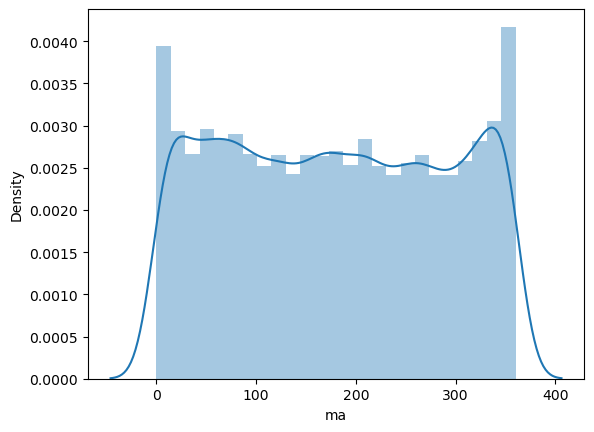

In [12]:
sns.distplot(df['ma'])

Pour l'analyse des variables qualitatives, on commence par voire les catégories qui se trouve dans chaque variable. Dans notre cas, c'est assez simple puisqu'il s'agit des noms des astéroïdes.

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

full_name----------------------------------------- ['       (2013 OV4)' '       (2011 QH117)' '       (2016 AQ193)' ...
 '       (2018 TJ2)' '       (2012 UL61)' '       (2005 UM157)']


#### i) Création des ensembles

On va créer les sous ensembles `data_arc` > 1 ans, et `data_arc` < 1 ans

In [14]:
less_than_1_year_df = df[df['data_arc'] < 365]
greater_than_1_year_df = df[df['data_arc'] > 365]

Comme on avait identifié le groupe de variable des écart-types, il pourrait s'avérer judicieux de créer un ensemble écart-types. 

In [15]:
missing_rate = df.isna().sum()/df.shape[0]
std_columns = df.columns[(missing_rate <  0.0084) & (missing_rate > 0.0083)]

On peut vérifier qu'il s'agit bien du groupe de variable des écart-types, en écrivant la condition sur les valeurs manquantes. On a bien seulement les écart-types qui affichent la valeur `True`.

In [16]:
(missing_rate <  0.0084) & (missing_rate > 0.0083)

full_name           False
sigma_e              True
sigma_a              True
sigma_i              True
sigma_om             True
sigma_w              True
sigma_ma             True
sigma_ad             True
sigma_n              True
sigma_tp             True
sigma_per            True
a                   False
e                   False
i                   False
om                  False
w                   False
ad                  False
q                   False
per_y               False
n_obs_used          False
ma                  False
condition_code      False
H                   False
epoch_mjd           False
data_arc            False
data_arc > 1 ans    False
dtype: bool

#### ii) Relation target/std

Les distributions de densité des variables $\sigma$ présente une concentration significative autour de zéro, indiquant une forte densité de valeurs proches de l'origine. Cette densité tend à se resserrer de manière importante, présentant des valeurs très élevées près de zéro et décroissant rapidement à mesure que l'on s'éloigne de cette valeur centrale. En d'autres termes, les densités de $\sigma$ sont très resserrées autour de $0$, avec une diminution drastique des valeurs à mesure que l'on s'éloigne de cette zone centrale.

De plus, on peut constaster qu'*a priori*, ces variables $\sigma$ sont complètement différentes suivants que la `data_arc` soit < ou > à $365 j$.

C:\Users\valco\AppData\Local\Temp\ipykernel_23400\253437208.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(less_than_1_year_df['sigma_e'], label='$< 365 j$')
C:\Users\valco\AppData\Local\Temp\ipykernel_23400\253437208.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(greater_than_1_year_d

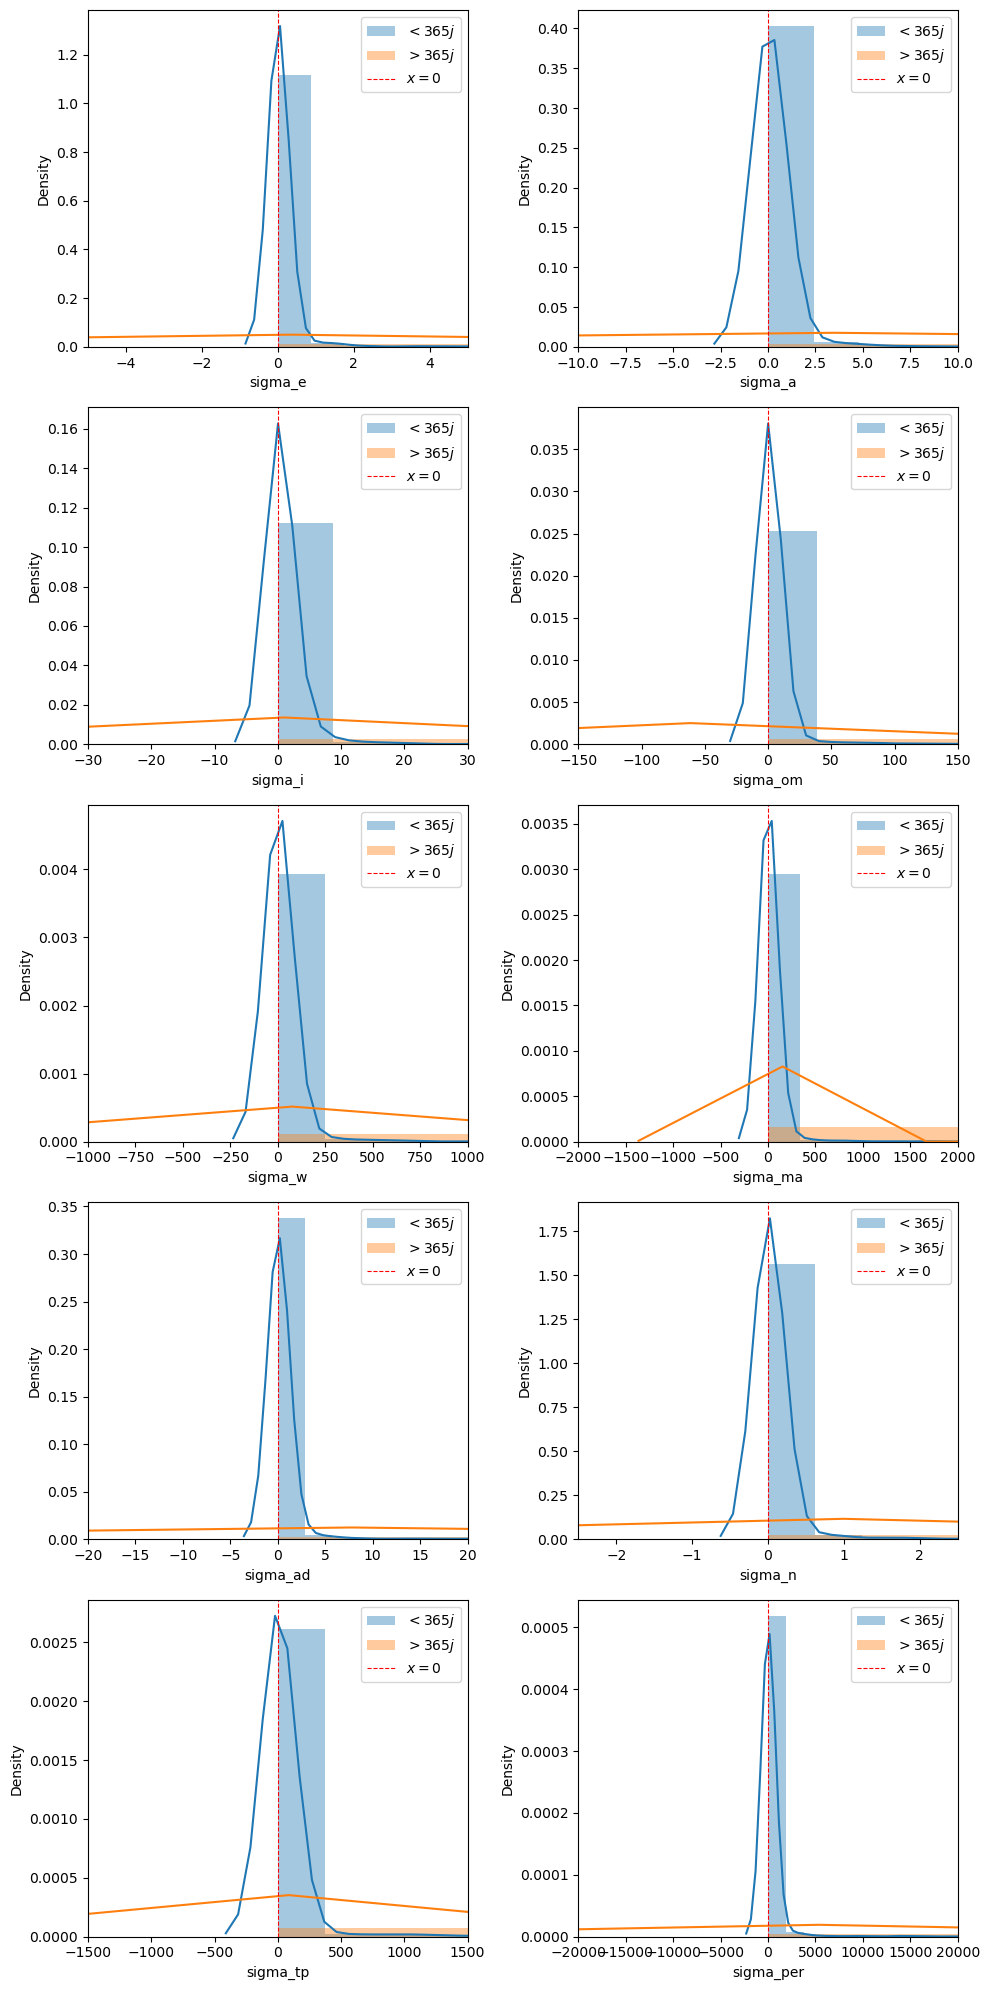

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

# Pour sigma_e
plt.subplot(5, 2, 1)
sns.distplot(less_than_1_year_df['sigma_e'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_e'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-5, 5)
plt.legend()

# Pour sigma_a
plt.subplot(5, 2, 2)
sns.distplot(less_than_1_year_df['sigma_a'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_a'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-10, 10)
plt.legend()

# Pour sigma_i
plt.subplot(5, 2, 3)
sns.distplot(less_than_1_year_df['sigma_i'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_i'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-30, 30)
plt.legend()

# Pour sigma_om
plt.subplot(5, 2, 4)
sns.distplot(less_than_1_year_df['sigma_om'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_om'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-150, 150)
plt.legend()

# Pour sigma_w
plt.subplot(5, 2, 5)
sns.distplot(less_than_1_year_df['sigma_w'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_w'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-1000, 1000)
plt.legend()

# Pour sigma_ma
plt.subplot(5, 2, 6)
sns.distplot(less_than_1_year_df['sigma_ma'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_ma'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-2000, 2000)
plt.legend()

# Pour sigma_ad
plt.subplot(5, 2, 7)
sns.distplot(less_than_1_year_df['sigma_ad'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_ad'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-20, 20)
plt.legend()

# Pour sigma_n
plt.subplot(5, 2, 8)
sns.distplot(less_than_1_year_df['sigma_n'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_n'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-2.5, 2.5)
plt.legend()

# Pour sigma_tp
plt.subplot(5, 2, 9)
sns.distplot(less_than_1_year_df['sigma_tp'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_tp'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-1500, 1500)
plt.legend()

# Pour sigma_per
plt.subplot(5, 2, 10)
sns.distplot(less_than_1_year_df['sigma_per'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['sigma_per'], label='$> 365 j$')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8, label='$x=0$')
plt.xlim(-0.2e5, 0.2e5)
plt.legend()

plt.tight_layout()


#### iii) Relation Variables/target

- Pour `a`, `e` et `i`, les différences entre les cas `data_arc` < ou > $365 j$ ne sont pas visuellement significative.

C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1895478488.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(less_than_1_year_df['a'], label='$< 365 j$')
C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1895478488.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(greater_than_1_year_df['a

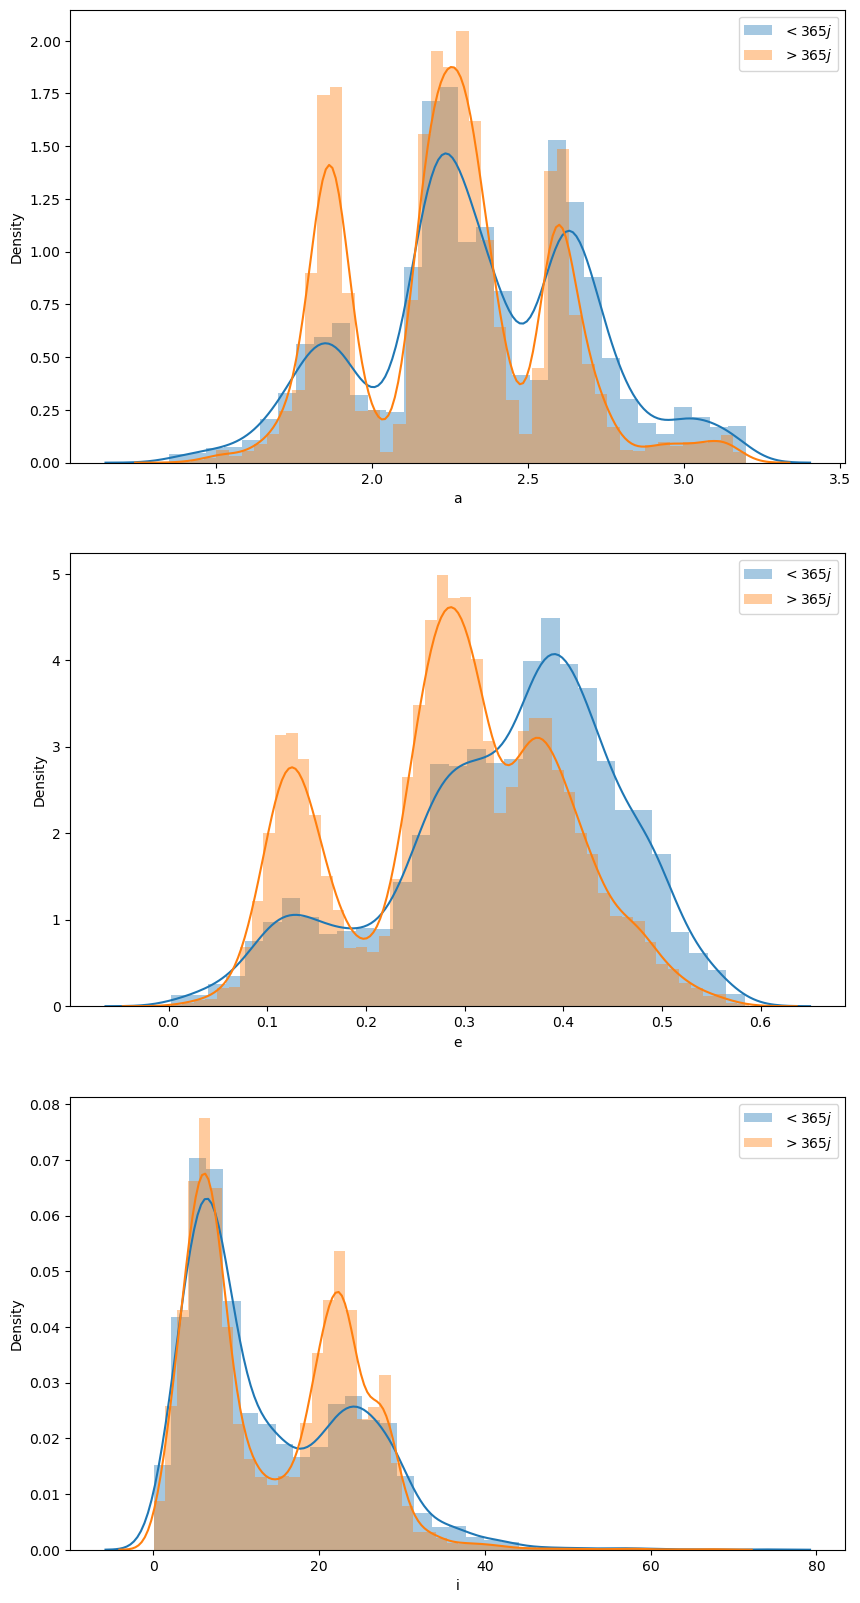

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.distplot(less_than_1_year_df['a'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['a'], label='$> 365 j$')
plt.legend()

plt.subplot(3, 1, 2)
sns.distplot(less_than_1_year_df['e'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['e'], label='$> 365 j$')
plt.legend()

plt.subplot(3, 1, 3)
sns.distplot(less_than_1_year_df['i'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['i'], label='$> 365 j$')
plt.legend()

- Il semblerait que les cas `data_arc` $> 365 j$ ont des distances au périhélie plus importante (variable `q`).
- *A priori*, le calcule des paramètres orbitaux des cas `data_arc` $> 365 j$ ont été basé sur nettement plus de points de données d'observation. On peut s'attendre à une plus grande précision des variables oribitales pour ces cas là. 
- Il semble aussi que les paramètres orbitaux des cas `data_arc` $> 365 j$ aient des taux de fiabilité bien meilleur (variable `condition_code`).
- La distribution associée aux données de la variable `H` où `data_arc` $> 365 j$ est centrée autour d'une moyenne plus petite que celle associée aux données où `data_arc` $< 365 j$. Il se peut que les objets avec une durée de récupération plus longue aient tendance à être moins lumineux ou moins réfléchissants.
- Pour la variable `epoch_mjd`, on a là aussi une différence visuellement nette. Les distributions pour le cas `data_arc` $> 365 j$ sont plus importantes. Il se peut que les objets célestes avec une durée de récupération plus longue (data_arc > 365) peuvent être observés à des moments différents de l'année par rapport aux objets avec une durée de récupération plus courte. 

Toutes ces interprétations graphiques ne sont pour l'instant qu'au stade d'idée. Même si notre intuition physique pourrait les conforter ou non, il faudra les transformer par la suite en hypothèse que l'on viendra tester. De plus, à ce niveau d'analyse, on ne parle que de différence significative d'un point de vue visuelle, mais ces différences sont-elles statistiquement significatives ? Les graphes que l'on a tracé jusqu'à maintenant ne permettent pas d'y répondre. Il se peut même que des différences statistiquement significatives n'aient pas été significativement visuelle pour qu'on les remarque. 

C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1399522023.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(less_than_1_year_df['om'], label='$< 365 j$')
C:\Users\valco\AppData\Local\Temp\ipykernel_23400\1399522023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(greater_than_1_year_df['

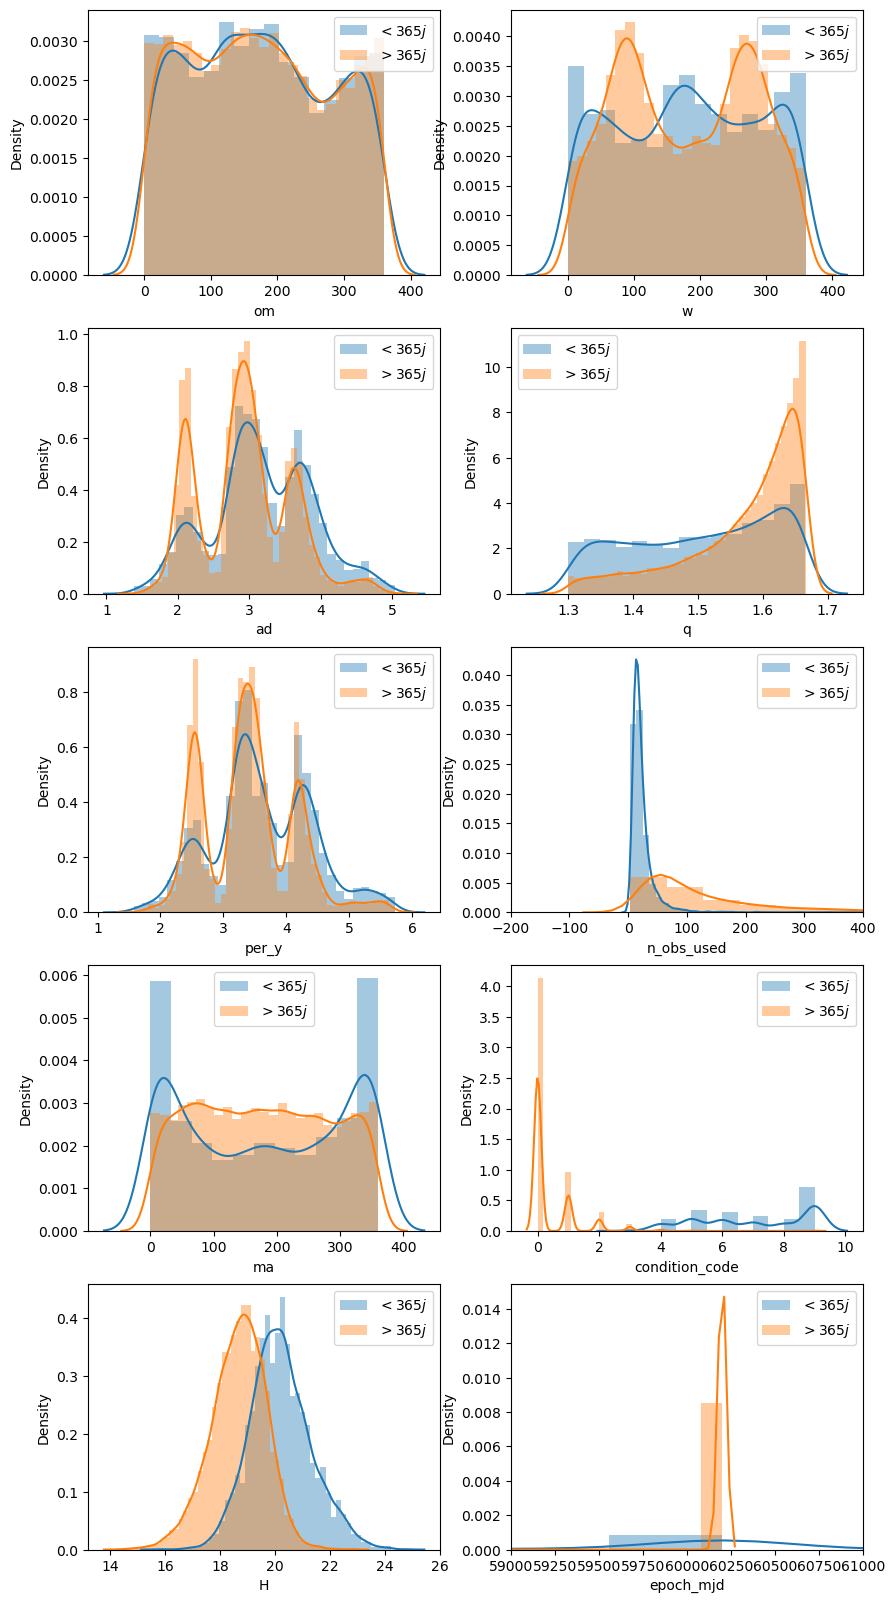

In [19]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

plt.subplot(5, 2, 1)
sns.distplot(less_than_1_year_df['om'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['om'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 2)
sns.distplot(less_than_1_year_df['w'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['w'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 3)
sns.distplot(less_than_1_year_df['ad'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['ad'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 4)
sns.distplot(less_than_1_year_df['q'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['q'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 5)
sns.distplot(less_than_1_year_df['per_y'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['per_y'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 6)
sns.distplot(less_than_1_year_df['n_obs_used'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['n_obs_used'], label='$> 365 j$')
plt.xlim(-200, 400)
plt.legend()

plt.subplot(5, 2, 7)
sns.distplot(less_than_1_year_df['ma'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['ma'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 8)
sns.distplot(less_than_1_year_df['condition_code'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['condition_code'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 9)
sns.distplot(less_than_1_year_df['H'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['H'], label='$> 365 j$')
plt.legend()

plt.subplot(5, 2, 10)
sns.distplot(less_than_1_year_df['epoch_mjd'], label='$< 365 j$')
sns.distplot(greater_than_1_year_df['epoch_mjd'], label='$> 365 j$')
plt.xlim(59000, 61000)
plt.legend()


## II/ Une exploration un peu plus détaillée 

- **Relation variable / variable** :
    - **std / std :** certaines variables sont à surveiller plus tard car elle semble très corrélées ($+0.9$ de coefficient de corrélation dans la `clustermap`): 
        - On note que les vaiables `sigam_e` et `sigma_n` sont très corrélées entre elles. De même que pour le triplet `sigma_a`, `sigma_ad`, et `sigma_per`. 
        - On note qu'il n'existe quasiment aucune corrélation entre le triplet `sigma_w`, `sigma_e`, et `sigma_n` avec la variable `sigma_ma`.

Text(0.5, 1.0, 'Clustermap du groupe de données des écarts-types')

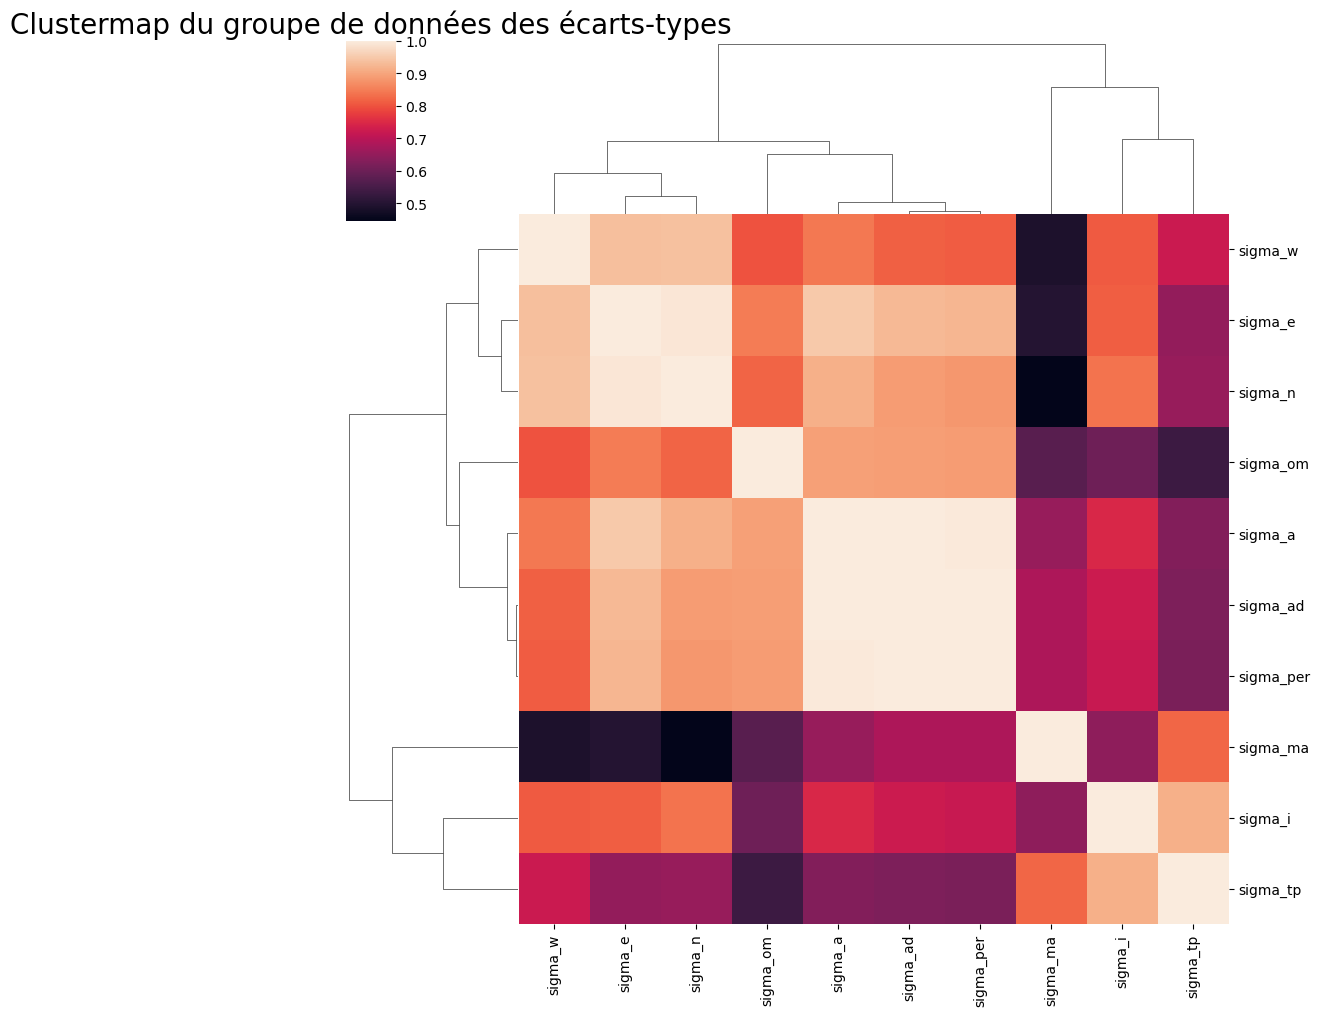

In [20]:
sns.clustermap(df[std_columns].corr())
plt.title('Clustermap du groupe de données des écarts-types', fontsize=20)

<Figure size 640x480 with 0 Axes>

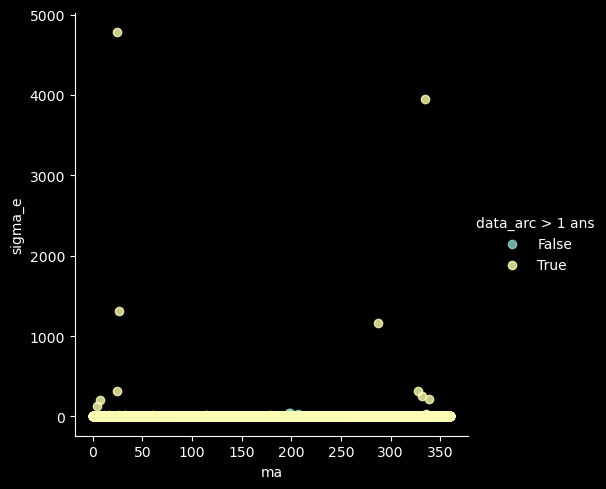

<Figure size 640x480 with 0 Axes>

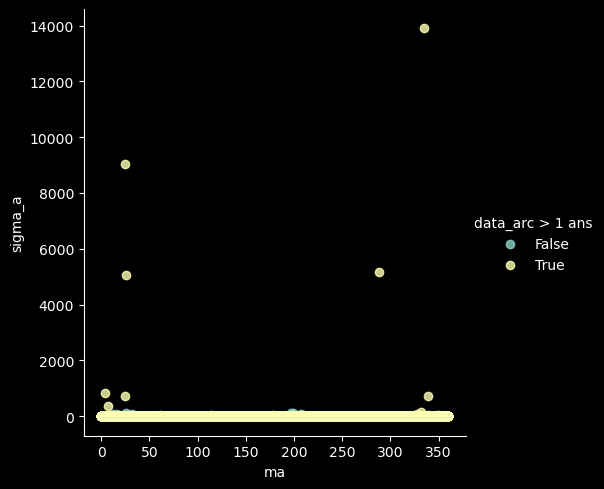

<Figure size 640x480 with 0 Axes>

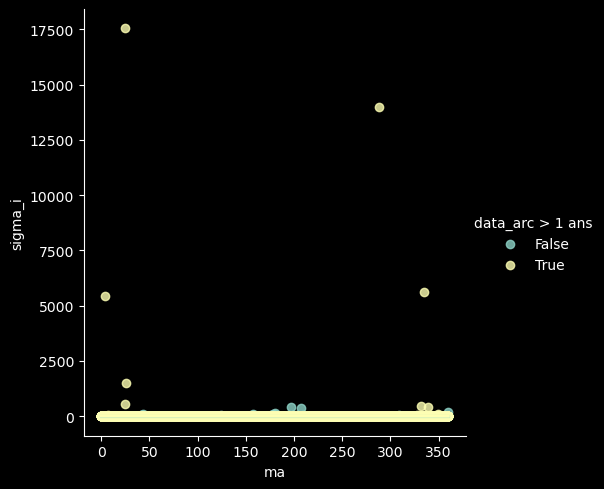

<Figure size 640x480 with 0 Axes>

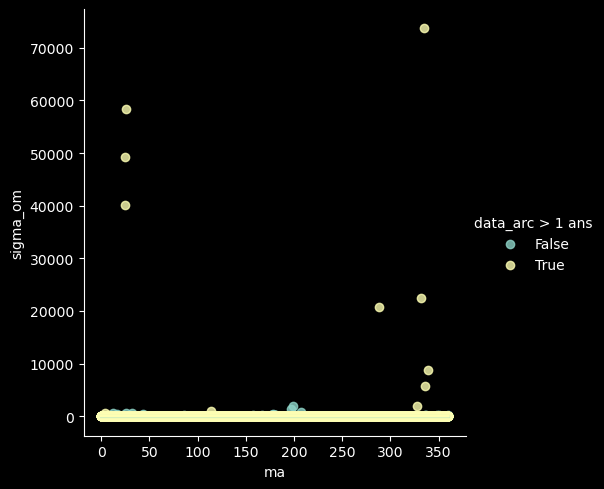

<Figure size 640x480 with 0 Axes>

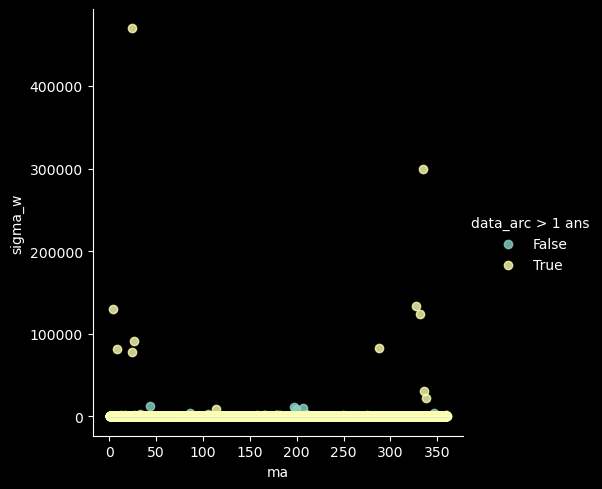

<Figure size 640x480 with 0 Axes>

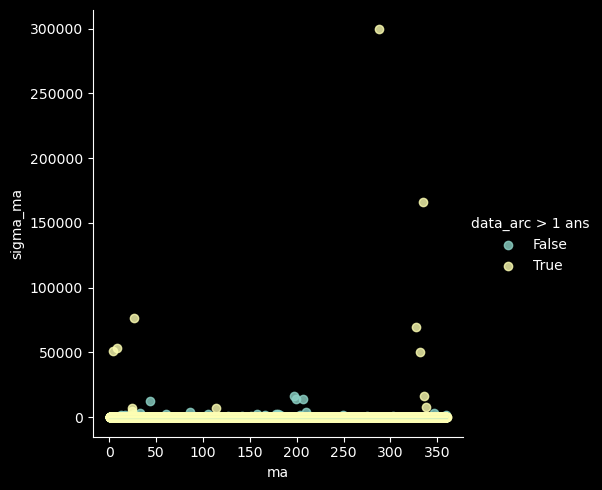

<Figure size 640x480 with 0 Axes>

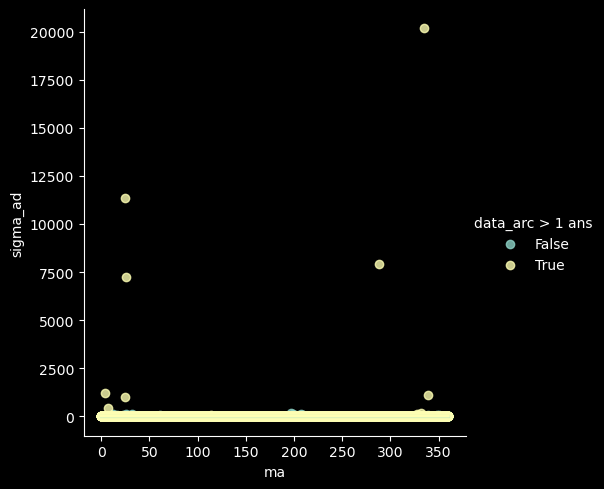

<Figure size 640x480 with 0 Axes>

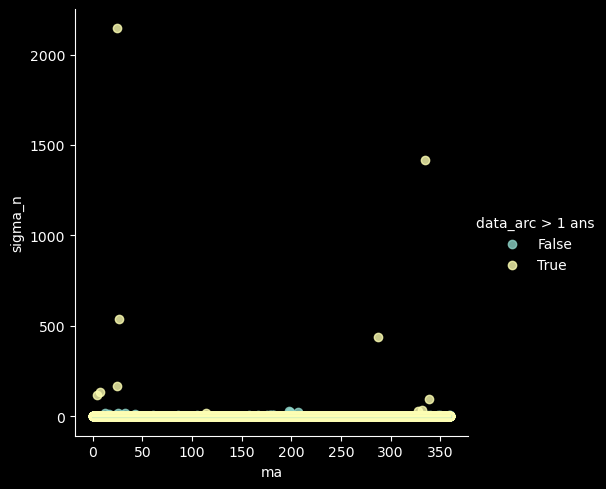

<Figure size 640x480 with 0 Axes>

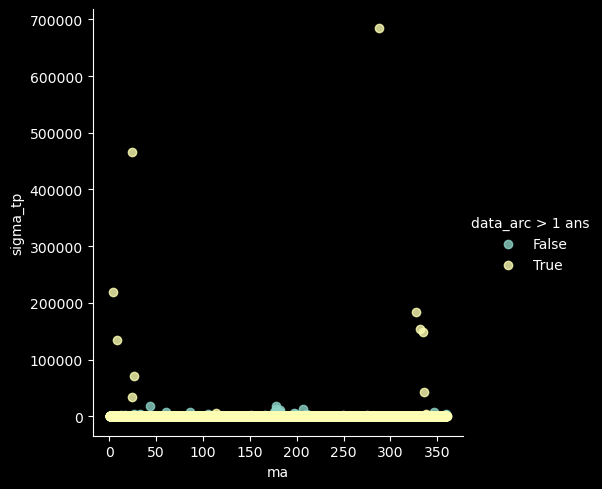

<Figure size 640x480 with 0 Axes>

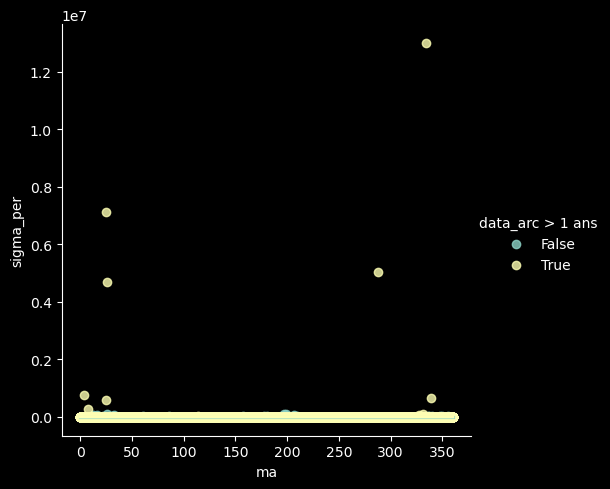

In [24]:
for col in std_columns:
    plt.figure()
    sns.lmplot(x='ma', y=col, hue='data_arc > 1 ans', data=df)

In [25]:
df.corr()['ma'].sort_values()

C:\Users\valco\AppData\Local\Temp\ipykernel_15400\2291984242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['ma'].sort_values()


epoch_mjd          -0.017420
w                  -0.013617
data_arc > 1 ans   -0.011205
i                  -0.009624
ad                 -0.008558
per_y              -0.008138
data_arc           -0.007938
e                  -0.007664
a                  -0.007627
sigma_n            -0.004985
sigma_i            -0.003966
sigma_w            -0.003698
n_obs_used         -0.003645
sigma_e            -0.001956
sigma_om           -0.001900
H                  -0.000451
sigma_tp            0.000350
sigma_a             0.001344
om                  0.001494
sigma_ad            0.002357
sigma_per           0.002470
q                   0.007444
sigma_ma            0.008740
condition_code      0.017436
ma                  1.000000
Name: ma, dtype: float64